<a href="https://colab.research.google.com/github/heiliaavola/chemical-analysis-quantification/blob/main/Chemical_analysis_quantification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chemical Analysis Quantification

###Katsetus ideaalandmetega

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.linear_model import LinearRegression

In [ ]:
#loon andmepunktid
ideal_data = pd.DataFrame({'Concentration':[1,2,3,3.5,4,4.5,5,6,7], 'Intensity':[0.5,0.7,1,1.5,2,2.5,3,3.3,3.4]})
ideal_data

,Concentration,Intensity
0,1.0,0.5
1,2.0,0.7
2,3.0,1.0
3,3.5,1.5
4,4.0,2.0
5,4.5,2.5
6,5.0,3.0
7,6.0,3.3
8,7.0,3.4


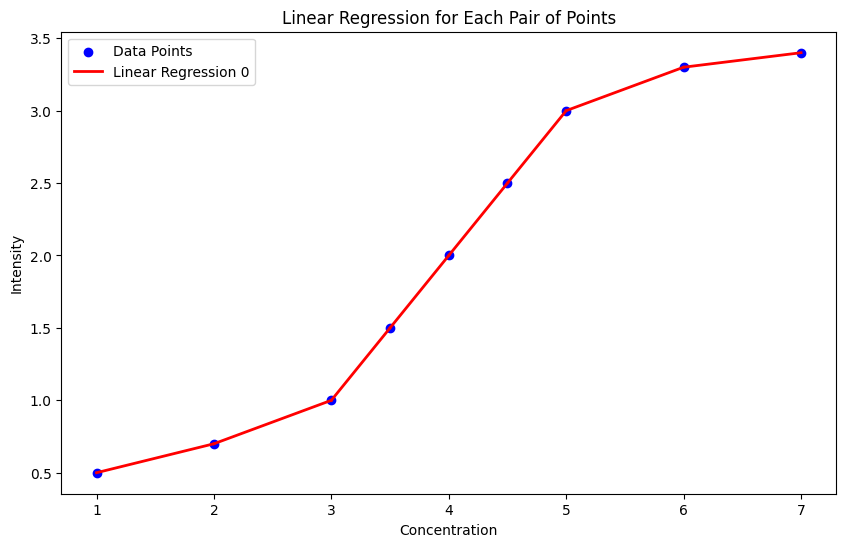

Pair 1 & 2: Slope = 0.1999999999999999, Intercept = 0.30000000000000016
Pair 2 & 3: Slope = 0.29999999999999993, Intercept = 0.1000000000000002
Pair 3 & 4: Slope = 0.9999999999999998, Intercept = -1.9999999999999991
Pair 4 & 5: Slope = 0.9999999999999998, Intercept = -1.9999999999999991
Pair 5 & 6: Slope = 0.9999999999999998, Intercept = -1.9999999999999991
Pair 6 & 7: Slope = 0.9999999999999998, Intercept = -1.9999999999999991
Pair 7 & 8: Slope = 0.29999999999999977, Intercept = 1.500000000000001
Pair 8 & 9: Slope = 0.10000000000000005, Intercept = 2.6999999999999993
Pair 1 & 2: MSE = 0.0
Pair 2 & 3: MSE = 6.162975822039155e-33
Pair 3 & 4: MSE = 0.0
Pair 4 & 5: MSE = 0.0
Pair 5 & 6: MSE = 0.0
Pair 6 & 7: MSE = 0.0
Pair 7 & 8: MSE = 0.0
Pair 8 & 9: MSE = 9.860761315262648e-32


In [ ]:
from sklearn.metrics import mean_squared_error
results = []
mse_results = []

# Prepare the plot
plt.figure(figsize=(10, 6))

# Plot the actual data points
plt.scatter(ideal_data['Concentration'], ideal_data['Intensity'], color='blue', label='Data Points')

# Loop through the DataFrame
for i in range(len(ideal_data) - 1):
    # Select pairs of points
    pair_data = ideal_data.iloc[i:i+2]

    # Prepare the data for linear regression
    X = pair_data['Concentration'].values.reshape(-1, 1)
    y = pair_data['Intensity'].values

    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Get the slope (coefficient) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    # Store the results
    results.append((slope, intercept))

    # Calculate predictions and MSE
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mse_results.append(mse)


    # Prepare the line for plotting
    line_X = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    line_y = model.predict(line_X)
    # Plot the line
    plt.plot(line_X, line_y, color='red', linewidth=2,
             label=f'Linear Regression {i}' if i == 0 else "_nolegend_")

# Add labels and title and legend
plt.xlabel('Concentration')
plt.ylabel('Intensity')
plt.title('Linear Regression for Each Pair of Points')
plt.legend()
plt.show()

# Displaying the results
for i, (slope, intercept) in enumerate(results):
    print(f"Pair {i+1} & {i+2}: Slope = {slope}, Intercept = {intercept}")
for i, mse in enumerate(mse_results):
    print(f"Pair {i+1} & {i+2}: MSE = {mse}")

In [ ]:
# Adjusted code to include the number of data points used in each group

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

max_group_size = len(ideal_data)

min_mse = float('inf')
best_group_size = None
best_group_index = None

# Loop through each group size
for group_size in range(2, max_group_size + 1):
    print(f"\nGroup Size: {group_size}")
    results = []
    mse_results = []

    # Loop through the DataFrame for the current group size
    for i in range(len(ideal_data) - group_size + 1):
        # Select groups of points
        group_data = ideal_data.iloc[i:i + group_size]

        # Prepare the data for linear regression
        X = group_data['Concentration'].values.reshape(-1, 1)
        y = group_data['Intensity'].values

        # Perform linear regression
        model = LinearRegression()
        model.fit(X, y)

        # Get the slope (coefficient) and intercept and Calculate predictions and MSE
        slope = model.coef_[0]
        intercept = model.intercept_
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        results.append((slope, intercept, mse))

        if mse < min_mse or (mse == min_mse and group_size > best_group_size):
            min_mse = mse
            best_group_size = group_size
            best_group_index = i

    # Displaying the results
    for j, (slope, intercept, mse) in enumerate(results):
        print(f"Group {j+1} with {group_size} Data Points: Slope = {slope}, Intercept = {intercept}, MSE = {mse}")

# Extracting the best group data
best_group_data = ideal_data.iloc[best_group_index:best_group_index + best_group_size]
print(f"Best Group Size: {best_group_size}, Starting Index: {best_group_index}, MSE = {min_mse}")
print("Best Group Data:")
print(best_group_data)


Group Size: 2
Group 1 with 2 Data Points: Slope = 0.1999999999999999, Intercept = 0.30000000000000016, MSE = 0.0
Group 2 with 2 Data Points: Slope = 0.29999999999999993, Intercept = 0.1000000000000002, MSE = 6.162975822039155e-33
Group 3 with 2 Data Points: Slope = 0.9999999999999998, Intercept = -1.9999999999999991, MSE = 0.0
Group 4 with 2 Data Points: Slope = 0.9999999999999998, Intercept = -1.9999999999999991, MSE = 0.0
Group 5 with 2 Data Points: Slope = 0.9999999999999998, Intercept = -1.9999999999999991, MSE = 0.0
Group 6 with 2 Data Points: Slope = 0.9999999999999998, Intercept = -1.9999999999999991, MSE = 0.0
Group 7 with 2 Data Points: Slope = 0.29999999999999977, Intercept = 1.500000000000001, MSE = 0.0
Group 8 with 2 Data Points: Slope = 0.10000000000000005, Intercept = 2.6999999999999993, MSE = 9.860761315262648e-32

Group Size: 3
Group 1 with 3 Data Points: Slope = 0.24999999999999994, Intercept = 0.2333333333333335, MSE = 0.0005555555555555572
Group 2 with 3 Data Points

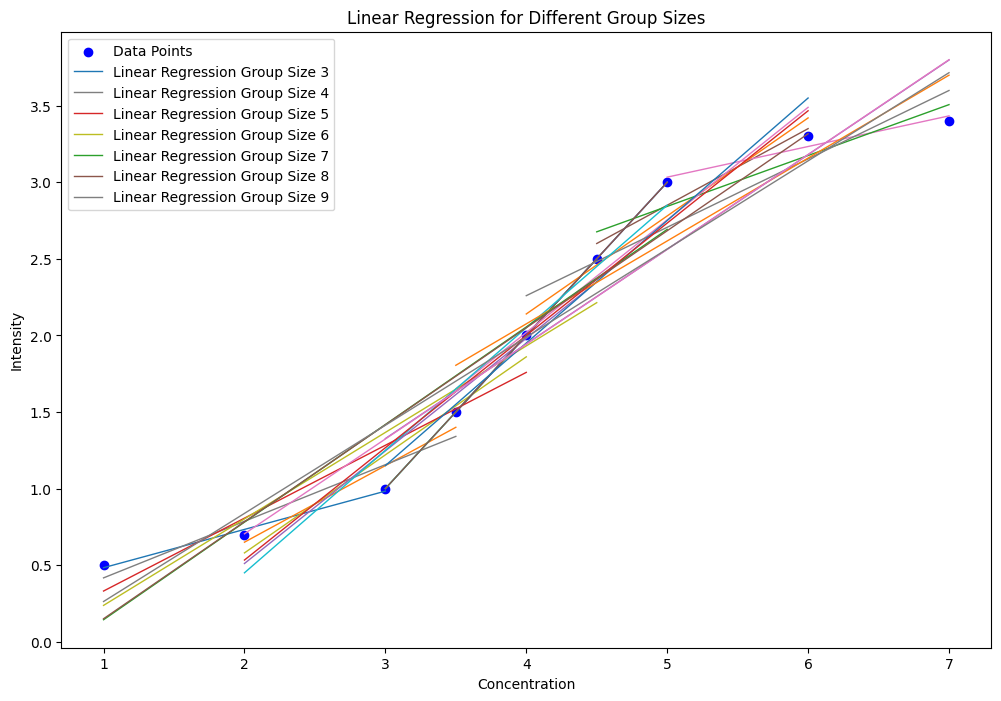

In [ ]:
# Visualizing linear regressions for all group sizes on one graph
plt.figure(figsize=(12, 8))

# Plot the actual data points
plt.scatter(ideal_data['Concentration'], ideal_data['Intensity'], color='blue', label='Data Points')

# Loop through each group size
for group_size in range(3, max_group_size + 1):
    # Loop through the DataFrame for the current group size
    for i in range(len(ideal_data) - group_size + 1):
        # Select groups of points
        group_data = ideal_data.iloc[i:i + group_size]

        # Prepare the data for linear regression
        X = group_data['Concentration'].values.reshape(-1, 1)
        y = group_data['Intensity'].values

        # Perform linear regression
        model = LinearRegression()
        model.fit(X, y)

        # Prepare the line for plotting
        line_X = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        line_y = model.predict(line_X)

        # Plot the line
        plt.plot(line_X, line_y, linewidth=1,
                 label=f'Linear Regression Group Size {group_size}' if i == 0 else "_nolegend_")

# Add labels and title
plt.xlabel('Concentration')
plt.ylabel('Intensity')
plt.title('Linear Regression for Different Group Sizes')

# Add legend
plt.legend()
plt.show()

In [ ]:
#Andmete sisselugemine
data = pd.read_csv('data_ready_231029.csv')

data.head()

grouped_data = data.groupby(['lab', 'compound']).agg({'peak_area': lambda x: x.tolist(), 'c_real_M': lambda x: x.tolist(), 'note': lambda x: x.tolist()}).reset_index()

# Print the grouped data
print(grouped_data[:5])


  lab            compound                                          peak_area  \
0  L1            Amitrole  [285600245.7, 103057658.3, 65933010.67, 380586...   
1  L1           Aspartame  [163756856.3, 41549141.0, 30317224.0, 12974311...   
2  L1            Atrazine  [1488899804.0, 477396103.7, 314155779.3, 16468...   
3  L1    Avermectin_B1a_H  [804421.3333, 259284.6667, 121807.6667, 29965....   
4  L1  Avermectin_B1a_NH4  [43714501.0, 15682877.67, 7710445.333, 2458357...   

                                            c_real_M  \
0  [6.25e-06, 2.58e-06, 1.34e-06, 7.78e-07, 2.35e...   
1  [1.72e-06, 7.04e-07, 3.58e-07, 2.13e-07, 7.22e...   
2  [1.93e-06, 8.29e-07, 4.24e-07, 2.48e-07, 8.51e...   
3           [1.35e-07, 7.02e-08, 4.78e-08, 2.77e-08]   
4  [1.35e-07, 7.02e-08, 4.78e-08, 2.77e-08, 1.17e...   

                                                note  
0  [non-linear, non-linear, non-linear, non-linea...  
1  [linear, non-linear, linear, linear, linear, n...  
2  [linear, non-l

[1.93e-06, 8.29e-07, 4.24e-07, 2.48e-07, 8.51e-08, 8.73e-09]
[1488899804.0, 477396103.7, 314155779.3, 164688273.0, 69336357.67, 5495160.333]


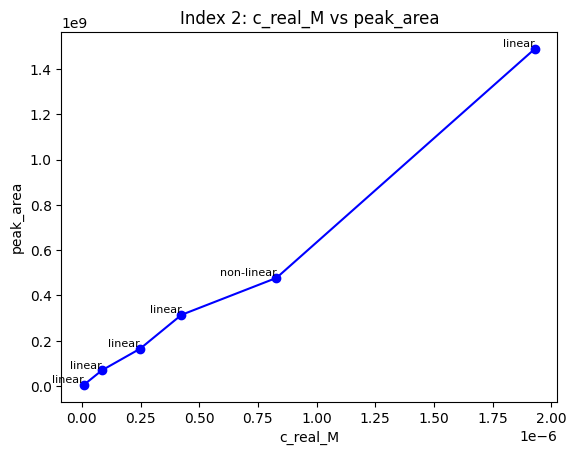

In [ ]:
index_value = 2  # Change this to the desired index (indeksid vahemikus 0-743)

# Use the index to retrieve the specific row
selected_row = grouped_data.iloc[index_value]

# Extract the 'c_real_M' and 'peak_area' lists
c_real_M_values = selected_row['c_real_M']
peak_area_values = selected_row['peak_area']
note_values = selected_row['note']
print(c_real_M_values)
print(peak_area_values)

# Plot the graph
plt.plot(c_real_M_values, peak_area_values, marker='o', linestyle='-', color='b')
plt.xlabel('c_real_M')
plt.ylabel('peak_area')
plt.title(f'Index {index_value}: c_real_M vs peak_area')

for c_real_M, peak_area, note in zip(c_real_M_values, peak_area_values, note_values):
    plt.text(c_real_M, peak_area, note, fontsize=8, ha='right', va='bottom')

plt.show()

In [ ]:
# Päris andmete peal arvutused
# Adjusted code to include the number of data points used in each group

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Make dataset of each substance
#range(len(grouped_data))
for index in range(2) :
  selected_row = grouped_data.iloc[index]
  # Extract the 'c_real_M' and 'peak_area' lists
  c_real_M_values = selected_row['c_real_M']
  peak_area_values = selected_row['peak_area']
  data = pd.DataFrame({'Concentration':[c_real_M_values], 'Intensity':[peak_area_values]})

  max_group_size = len(grouped_data[:5])

  min_mse = float('inf')
  best_group_size = None
  best_group_index = None

  # Loop through each group size
  for group_size in range(2, max_group_size + 1):
      print(f"\nGroup Size: {group_size}")
      results = []
      mse_results = []

      # Loop through the DataFrame for the current group size
      for i in range(len(grouped_data[:5]) - group_size + 1):
          # Select groups of points
          group_data = grouped_data[:5].iloc[i:i + group_size]

          # Prepare the data for linear regression
          X = [item for sublist in group_data['c_real_M'] for item in sublist]
          X = np.array(X).reshape(-1, 1)

          # Flatten the lists in 'peak_area'
          y = [item for sublist in group_data['peak_area'] for item in sublist]

          # Perform linear regression
          model = LinearRegression()
          model.fit(X, y)

          # Get the slope (coefficient) and intercept and Calculate predictions and MSE
          slope = model.coef_[0]
          intercept = model.intercept_
          y_pred = model.predict(X)
          mse = mean_squared_error(y, y_pred)
          results.append((slope, intercept, mse))

          if mse < min_mse or (mse == min_mse and group_size > best_group_size):
              min_mse = mse
              best_group_size = group_size
              best_group_index = i

      # Displaying the results
      for j, (slope, intercept, mse) in enumerate(results):
          print(f"Group {j+1} with {group_size} Data Points: Slope = {slope}, Intercept = {intercept}, MSE = {mse}")

  # Extracting the best group data
  best_group_data = grouped_data[:5].iloc[best_group_index:best_group_index + best_group_size]
  print(f"Best Group Size: {best_group_size}, Starting Index: {best_group_index}, MSE = {min_mse}")
  print("Best Group Data:")
  print(best_group_data)

                                       Concentration  \
0  [6.25e-06, 2.58e-06, 1.34e-06, 7.78e-07, 2.35e...   

                                           Intensity  
0  [285600245.7, 103057658.3, 65933010.67, 380586...  

Group Size: 2
Group 1 with 2 Data Points: Slope = 45642069079904.63, Intercept = 9273419.589259356, MSE = 566239486035876.6
Group 2 with 2 Data Points: Slope = 481965424992561.94, Intercept = -33769127.120842606, MSE = 7.330688412845922e+16
Group 3 with 2 Data Points: Slope = 768823847587754.4, Intercept = -40459525.97075978, MSE = 2535952490209844.5
Group 4 with 2 Data Points: Slope = 178828970804037.28, Intercept = -3150328.6499905195, MSE = 109364103191511.16

Group Size: 3
Group 1 with 3 Data Points: Slope = 69462779546519.02, Intercept = 113683119.88944112, MSE = 1.0649769361092464e+17
Group 2 with 3 Data Points: Slope = 481322009637915.75, Intercept = -33429677.35703844, MSE = 5.507162802668613e+16
Group 3 with 3 Data Points: Slope = 762613632929507.4, Interce

In [ ]:
# Päris andmete peal arvutused

# Adjusted code to include the number of data points used in each group

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#make dataset of each substance
for index in len(grouped_data) :
  selected_row = grouped_data.iloc[index]
  # Extract the 'c_real_M' and 'peak_area' lists
  c_real_M_values = selected_row['c_real_M']
  peak_area_values = selected_row['peak_area']
  data = pd.DataFrame({'Concentration':[c_real_M_values], 'Intensity':[peak_area_values]})

  max_group_size = len(grouped_data[:5])

  min_mse = float('inf')
  best_group_size = None
  best_group_index = None

  # Loop through each group size
  for group_size in range(2, max_group_size + 1):
      print(f"\nGroup Size: {group_size}")
      results = []
      mse_results = []

      # Loop through the DataFrame for the current group size
      for i in range(len(grouped_data[:5]) - group_size + 1):
          # Select groups of points
          group_data = grouped_data[:5].iloc[i:i + group_size]

          # Prepare the data for linear regression
          X = [item for sublist in group_data['c_real_M'] for item in sublist]
          X = np.array(X).reshape(-1, 1)

          # Flatten the lists in 'peak_area'
          y = [item for sublist in group_data['peak_area'] for item in sublist]

          # Perform linear regression
          model = LinearRegression()
          model.fit(X, y)

          # Get the slope (coefficient) and intercept and Calculate predictions and MSE
          slope = model.coef_[0]
          intercept = model.intercept_
          y_pred = model.predict(X)
          mse = mean_squared_error(y, y_pred)
          results.append((slope, intercept, mse))

          if mse < min_mse or (mse == min_mse and group_size > best_group_size):
              min_mse = mse
              best_group_size = group_size
              best_group_index = i

      # Displaying the results
      for j, (slope, intercept, mse) in enumerate(results):
          print(f"Group {j+1} with {group_size} Data Points: Slope = {slope}, Intercept = {intercept}, MSE = {mse}")

  # Extracting the best group data
  best_group_data = grouped_data[:5].iloc[best_group_index:best_group_index + best_group_size]
  print(f"Best Group Size: {best_group_size}, Starting Index: {best_group_index}, MSE = {min_mse}")
  print("Best Group Data:")
  print(best_group_data)


Group Size: 2
Group 1 with 2 Data Points: Slope = 45642069079904.63, Intercept = 9273419.589259356, MSE = 566239486035876.6
Group 2 with 2 Data Points: Slope = 481965424992561.94, Intercept = -33769127.120842606, MSE = 7.330688412845922e+16
Group 3 with 2 Data Points: Slope = 768823847587754.4, Intercept = -40459525.97075978, MSE = 2535952490209844.5
Group 4 with 2 Data Points: Slope = 178828970804037.28, Intercept = -3150328.6499905195, MSE = 109364103191511.16

Group Size: 3
Group 1 with 3 Data Points: Slope = 69462779546519.02, Intercept = 113683119.88944112, MSE = 1.0649769361092464e+17
Group 2 with 3 Data Points: Slope = 481322009637915.75, Intercept = -33429677.35703844, MSE = 5.507162802668613e+16
Group 3 with 3 Data Points: Slope = 762613632929507.4, Intercept = -33525766.720577955, MSE = 1762791952755603.5

Group Size: 4
Group 1 with 4 Data Points: Slope = 77995151033307.3, Intercept = 85169005.65284076, MSE = 8.907811166759499e+16
Group 2 with 4 Data Points: Slope = 47512114